<a href="https://colab.research.google.com/github/Relieq/Heart-Disease-Prediction/blob/master/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 26.3MB/s]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


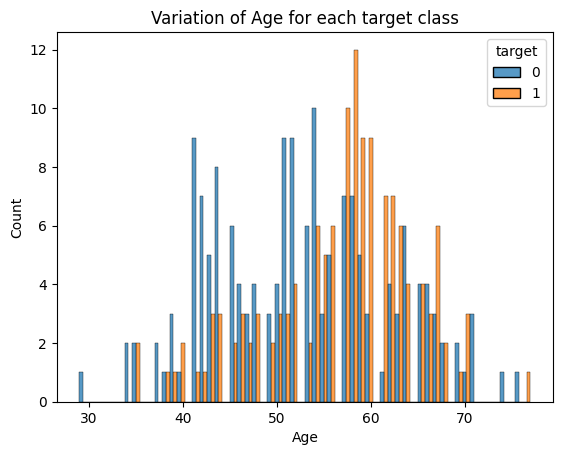

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Fill missing target values with mode (most frequent value)
df['target'] = df['target'].fillna(df['target'].mode()[0])

# Create side-by-side histogram (multiple="dodge" with separate bars for each class)
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=60, kde=False)

# Titles and labels for the plot
plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')

# Show plot
plt.show()



<ipython-input-46-7ea289ac7d87>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='age', hue='target', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


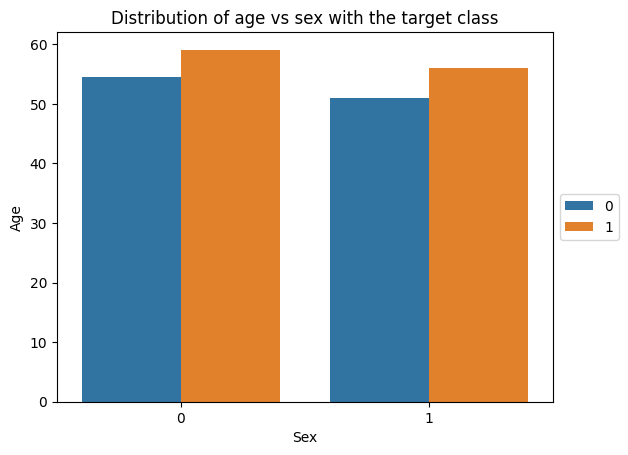

In [46]:
# Barplot of sex vs age with hue = target
sns.barplot(data=df, x='sex', y='age', hue='target', ci=None)

# Titles and labels for the plot
plt.title('Distribution of age vs sex with the target class')
plt.xlabel('Sex')
plt.ylabel('Age')

# Move legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

In [47]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Split the data into features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
    accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

    print(f'{model_name} - Accuracy for training set: {accuracy_for_train}, Accuracy for test set: {accuracy_for_test}')

# List of models to evaluate
models = [
    (KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'), 'KNN'),
    (SVC(kernel='rbf', random_state=42), 'SVM'),
    (GaussianNB(), 'Naive Bayes'),
    (DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42), 'Decision Tree'),
    (RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42), 'Random Forest'),
    (AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42), 'AdaBoost'),
    (GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42), 'GradientBoost'),
    (XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100), 'XGBoost')
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, model_name)

KNN - Accuracy for training set: 0.76, Accuracy for test set: 0.69
SVM - Accuracy for training set: 0.66, Accuracy for test set: 0.67
Naive Bayes - Accuracy for training set: 0.85, Accuracy for test set: 0.84
Decision Tree - Accuracy for training set: 1.0, Accuracy for test set: 0.75
Random Forest - Accuracy for training set: 0.98, Accuracy for test set: 0.8
AdaBoost - Accuracy for training set: 0.91, Accuracy for test set: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoost - Accuracy for training set: 1.0, Accuracy for test set: 0.85
XGBoost - Accuracy for training set: 1.0, Accuracy for test set: 0.87


In [48]:
# Define the base models
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Stacking Classifier
from sklearn.ensemble import StackingClassifier

# Define the Stacking Classifier with the meta-learner
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', dtc),
        ('random_forest', rfc),
        ('knn', knn),
        ('xgboost', xgb),
        ('gradient_boosting', gc),
        ('svm', svc),
        ('adaboost', ad)
    ],
    final_estimator=GradientBoostingClassifier(random_state=42)
)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Predict on both the training and test sets
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Create confusion matrices for both train and test sets
from sklearn.metrics import confusion_matrix
import numpy as np

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy for training and test sets
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print out the accuracies
print(f'Accuracy for training set for Stacking = {accuracy_for_train}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.92


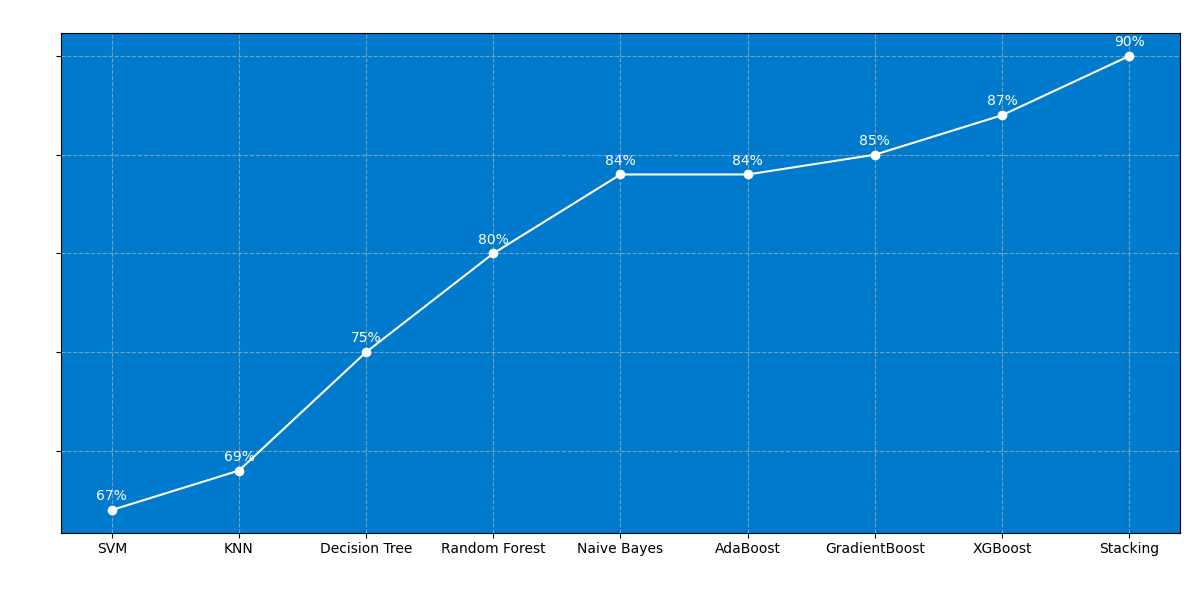

In [56]:
import matplotlib.pyplot as plt

# Độ chính xác của từng mô hình (cập nhật độ chính xác của XGBoost)
models = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes',
          'AdaBoost', 'GradientBoost', 'XGBoost', 'Stacking']
accuracies = [67, 69, 75, 80, 84, 84, 85, 87, 90]

plt.figure(figsize=(12, 6))
plt.plot(models, accuracies, marker='o', color='white')

# Thêm tiêu đề và nhãn trục
plt.title('Heart Disease Prediction using Various Machine Learning Models', fontsize=14, color='white')
plt.xlabel('Machine Learning Models', fontsize=12, color='white')
plt.ylabel('Accuracy (%)', fontsize=12, color='white')

# Điều chỉnh màu nền
plt.gca().set_facecolor('#007acc')  # Màu nền của biểu đồ
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị độ chính xác vào từng điểm
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f'{acc}%', ha='center', color='white')

# Đặt các nhãn trục X nằm ngang và tăng khoảng cách giữa chúng
plt.xticks(ticks=range(len(models)), labels=models, rotation=0, ha='center', color='black')

# Tăng khoảng cách giữa các điểm trên trục X
plt.subplots_adjust(bottom=0.2)  # Điều chỉnh bố cục để có thêm không gian cho các nhãn

plt.yticks(color='white')

# Đảm bảo không bị cắt xén các nhãn trục X
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()